In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
programs_to_show = ['sequential', 'mpi_priority']
new_program = 'mpi_priority'
assert new_program in programs_to_show
old_program = 'sequential'
assert old_program in programs_to_show

In [3]:
raw_benchmark_results = pd.read_csv('../benchmarks/2020-12-07-priority-fast-stop-1.csv')

raw_benchmark_results.sample(5)

,generation_config_i,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,regen_i,repetition_i,diff_program,mpi_procs,micros_input,micros_precompute,micros_until_len,micros_edit_script
178,56,addremove,3419,0.6,0.0,zipf,0,1,sequential,NaN,349,0,59247,1469
227,126,remove,6993,1.0,0.0,zipf,0,0,mpi_priority,8.0,374,0,125253,0
473,122,remove,6993,0.8,0.0,zipf,0,0,sequential,NaN,435,0,241067,2529
571,62,remove,3419,1.0,0.0,zipf,0,0,mpi_priority,8.0,340,0,29561,0
602,145,remove,10000,0.2,0.0,zipf,0,1,sequential,NaN,1197,0,35671,916


In [4]:
indexed_benchmark_results = raw_benchmark_results.set_index(['generation_config_i', 'regen_i', 'diff_program', 'repetition_i'])
indexed_benchmark_results

input_strategy  \
generation_config_i regen_i diff_program repetition_i                  
48                  0       mpi_priority 0                       add   
                                         1                       add   
                            sequential   0                       add   
                                         1                       add   
142                 0       mpi_priority 0                    remove   
...                                                              ...   
10                  0       sequential   0                    remove   
                                         1                    remove   
78                  0       mpi_priority 0                    remove   
                            sequential   0                    remove   
                                         1                    remove   

                                                       input_length_1  \
generation_config_i regen_i diff_program repetition_i                   
48                  0       mpi_priority 0                       3419   
                                         1                       3419   
                            sequential   0                       3419   
                                         1                       3419   
142                 0       mpi_priority 0                       8362   
...                                                               ...   
10                  0       sequential   0                       2000   
                                         1                       2000   
78                  0       mpi_priority 0                       4089   
                            sequential   0                       4089   
                                         1                       4089   

                                                       input_change_strength  \
generation_config_i regen_i diff_program repetition_i                          
48                  0       mpi_priority 0                               0.2   
                                         1                               0.2   
                            sequential   0                               0.2   
                                         1                               0.2   
142                 0       mpi_priority 0                               1.0   
...                                                                      ...   
10                  0       sequential   0                               0.8   
                                         1                               0.8   
78                  0       mpi_priority 0                               1.0   
                            sequential   0                               1.0   
                                         1                               1.0   

                                                       input_chunkiness  \
generation_config_i regen_i diff_program repetition_i                     
48                  0       mpi_priority 0                          0.0   
                                         1                          0.0   
                            sequential   0                          0.0   
                                         1                          0.0   
142                 0       mpi_priority 0                          0.0   
...                                                                 ...   
10                  0       sequential   0                          0.0   
                                         1                          0.0   
78                  0       mpi_priority 0                          0.0   
                            sequential   0                          0.0   
                                         1                          0.0   

                                                      input_distribution  \
generation_config_i regen_i diff_program repetition_i                     

In [5]:
unique_regen_i_values = sorted(np.unique(indexed_benchmark_results.index.get_level_values('regen_i').values))
assert(unique_regen_i_values == [0])

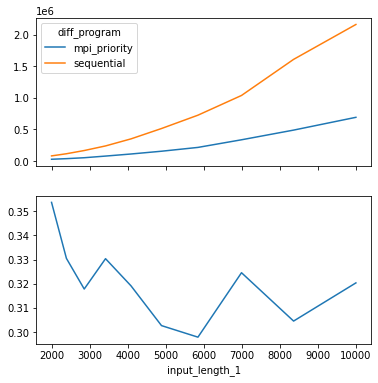

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
temp = temp[temp.index.get_level_values('diff_program').isin(programs_to_show)]
temp = temp[temp['input_strategy'] == 'independent']
temp = temp.set_index('input_length_1', append=True)
temp = temp.unstack('diff_program')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot(ax=ax[0]);
(temp[new_program] / temp[old_program]).plot(ax=ax[1]);

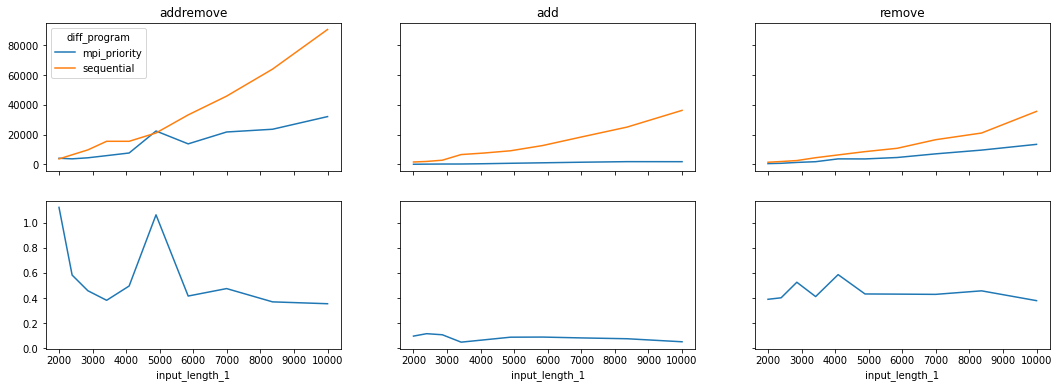

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(18, 6), sharex=True, sharey='row')
for input_strategy_i, input_strategy in enumerate(['addremove', 'add', 'remove']):
    temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
    temp = temp[(temp['input_strategy'] == input_strategy) & (temp['input_change_strength'] == 1/5) & (temp['input_chunkiness'] == 0)]
    temp = temp[temp.index.get_level_values('diff_program').isin(programs_to_show)]
    temp = temp.set_index('input_length_1', append=True)
    temp = temp.unstack('diff_program')['micros_until_len']
    temp = temp.droplevel('generation_config_i')
    temp = temp.sort_index()

    temp.plot(ax=ax[0][input_strategy_i], legend=(input_strategy_i == 0), title=input_strategy);
    (temp[new_program] / temp[old_program]).plot(ax=ax[1][input_strategy_i]);

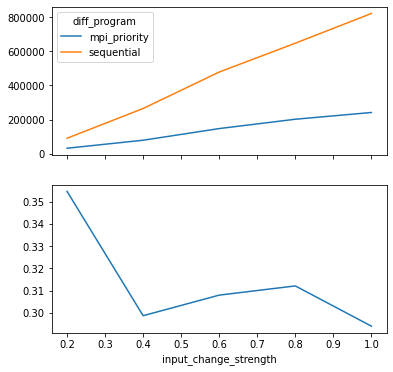

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
temp = temp[(temp['input_strategy'] == 'addremove') & (temp['input_length_1'] == temp['input_length_1'].max()) & (temp['input_chunkiness'] == 0)]
temp = temp[temp.index.get_level_values('diff_program').isin(programs_to_show)]
temp = temp.set_index('input_change_strength', append=True)
temp = temp.unstack('diff_program')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot(ax=ax[0]);
(temp[new_program] / temp[old_program]).plot(ax=ax[1]);

0.95
0.940625
0.025


,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,mpi_procs,micros_input,micros_precompute,micros_until_len,micros_edit_script
0,addremove,2000,0.2,0.0,zipf,8.0,364,0,10364,0
1,addremove,2000,0.2,0.0,zipf,8.0,364,0,10364,0
2,addremove,2000,0.4,0.0,zipf,8.0,281,0,21438,0
3,addremove,2000,1.0,0.0,zipf,8.0,364,0,124429,0
4,remove,2859,0.2,0.0,zipf,8.0,458,0,1389,0
5,remove,3419,0.2,0.0,zipf,8.0,541,0,21225,0
6,addremove,3419,0.6,0.0,zipf,8.0,600,0,20580,0
7,addremove,4890,0.2,0.0,zipf,8.0,519,0,22490,0


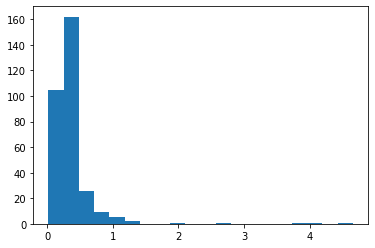

In [9]:
temp = indexed_benchmark_results['micros_until_len'].unstack('diff_program')
print((temp[new_program] < temp[old_program]).mean())
print((1.1 * temp[new_program] < temp[old_program]).mean())
print((temp[new_program] > 1.1 * temp[old_program]).mean())

hist_values = temp[new_program] / temp[old_program]
hist_values = hist_values.clip(upper=5)
plt.hist(hist_values, bins=20);

beaten_rows = []
for generation_config_i in temp[temp[new_program] > 1.1 * temp[old_program]].index.get_level_values('generation_config_i'):
    beaten_rows.append(indexed_benchmark_results.xs(generation_config_i, level='generation_config_i').iloc[0].to_dict())
pd.DataFrame(beaten_rows)